In [1]:
import pandas as pd
import numpy as np

edu_data_read = pd.read_excel("edu_data.xlsx")

## 1-4-7-10... sekilde hangi satirla ilgilendigim
edu_data = edu_data_read.iloc[1::3]
edu_data

,gender,NationalITy,PlaceofBirth,StageID,SectionID,Topic,Semester,Relation,raisedhands,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
1,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,20,3,25,Yes,Good,Under-7,M
4,M,KW,KuwaIT,lowerlevel,A,IT,F,Father,40,12,50,No,Bad,Above-7,M
7,M,KW,KuwaIT,MiddleSchool,A,Math,F,Father,50,15,22,Yes,Good,Under-7,M
10,M,KW,KuwaIT,MiddleSchool,A,Math,F,Father,50,30,80,Yes,Good,Under-7,H
13,M,lebanon,lebanon,MiddleSchool,A,Math,F,Father,20,12,19,No,Bad,Above-7,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,F,Jordan,Jordan,MiddleSchool,A,Geology,F,Mum,80,64,58,Yes,Good,Under-7,H
469,F,Jordan,Jordan,MiddleSchool,A,Chemistry,S,Father,9,15,85,No,Bad,Above-7,L
472,M,Palestine,Palestine,MiddleSchool,A,Geology,F,Father,80,74,68,Yes,Good,Under-7,M
475,F,Jordan,Jordan,MiddleSchool,A,Chemistry,S,Father,5,5,8,No,Bad,Above-7,L


In [2]:
row = edu_data.shape[0] 
column = edu_data.shape[1]

In [3]:
edu_data.index = pd.RangeIndex(start = 0,stop = 160, step= 1)
## edu_data
edu_data_copy = edu_data.copy()

In [4]:
edu_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    160 non-null    object
 1   NationalITy               160 non-null    object
 2   PlaceofBirth              160 non-null    object
 3   StageID                   160 non-null    object
 4   SectionID                 160 non-null    object
 5   Topic                     160 non-null    object
 6   Semester                  160 non-null    object
 7   Relation                  160 non-null    object
 8   raisedhands               160 non-null    int64 
 9   AnnouncementsView         160 non-null    int64 
 10  Discussion                160 non-null    int64 
 11  ParentAnsweringSurvey     160 non-null    object
 12  ParentschoolSatisfaction  160 non-null    object
 13  StudentAbsenceDays        160 non-null    object
 14  Class                     

#                                                 Madde 1 

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
def verileri_at(dataframe, column_name):
    """
    Summary :
         Verinin merkezinden iki standart sapma uzaklıktaki verileri nan olarak ata.
         Daha sonra nan olarak atanan verileri mod ile doldur.
    
    Args:
        column_name (str): 
            dataframe'in kolonunun adı
        dataframe (DataFrame):
            verinin merkezinden iki standart sapma uzağındaki atılacak verilerin dataframe'i
            
    Returns:
        data.frame --> edu_data
    """
    
    # 𝜇 kolonun ortalaması 
    kolonun_ortalaması = int(dataframe[column_name].mean())
    # 𝜎 kolonun standart sapması
    kolonun_std = int(dataframe[column_name].std()) 
    
    # merkezden iki standart sapma ilerisinde ki verinin sayısal değeri
    mu_arti_ikisigma = (int(kolonun_ortalaması) + 2 * (int(kolonun_std)))
    
    # merkezden iki standart sapma gerisinde ki verinin sayısal değeri
    mu_eksi_ikisigma = (int(kolonun_ortalaması) - 2 * (int(kolonun_std)))
    
    # merkezden iki standart sapma ileriside ki verinin sayısal değerden büyük olanlara nan ata
    dataframe.loc[dataframe[column_name] > mu_arti_ikisigma, column_name] = np.nan
    
    # merkezden iki standart sapma gerisinde ki verinin sayısal değerden kücük olanlara nan ata
    dataframe.loc[dataframe[column_name] < mu_eksi_ikisigma, column_name] = np.nan
    
    # ilgili kolonun en cok tekrar eden degerini bul
    mode = dataframe.loc[:, [column_name]].mode()
    
    # na veri iceren kolona yukarıda ki degiskende bulunan mod degerini ata
    dataframe.loc[dataframe[column_name].isna(), [column_name]] = mode.values
    
    return dataframe


# veri setinden sadece numeric veriler iceren kolonları al
numeric_veriler = [x for x in edu_data.columns if (edu_data[x].dtypes == "int64") or 
                                                 (edu_data[x].dtypes == "float64")]

# numeric veriler iceren kolonların hepsi icin metodu uygula
for i in edu_data[numeric_veriler].columns:
    verileri_at(edu_data, edu_data[i].name)

In [7]:
numeric_veriler = [x for x in edu_data.columns if (edu_data[x].dtypes == "int64") or 
                                                 (edu_data[x].dtypes == "float64")]
arrayy = []
for i in edu_data[numeric_veriler].columns:
    arrayy.append(edu_data.loc[:,  i].mode().values)

mode = pd.DataFrame(arrayy)

veri_ozeti = pd.DataFrame([edu_data.describe().T.loc[:, "mean"], edu_data.describe().T.loc[:, "std"]]).T
veri_ozeti.insert(2, "mod", mode)

In [8]:
veri_ozeti

,mean,std,mod
raisedhands,45.13125,31.255112,80.0
AnnouncementsView,36.74375,25.023322,12.0
Discussion,41.53125,26.801606,40.0


# Madde 2

In [9]:
kategorik_veriler = [x for x in edu_data.columns if edu_data[x].dtypes == "O"]

In [10]:
sum_no_column_2 = ["gender", "Semester", "Relation", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "StudentAbsenceDays"]
sum_no_column_3 = ["StageID", "SectionID", "Class"]
sum_no_column_12 = ["Topic", "PlaceofBirth", "NationalITy"]

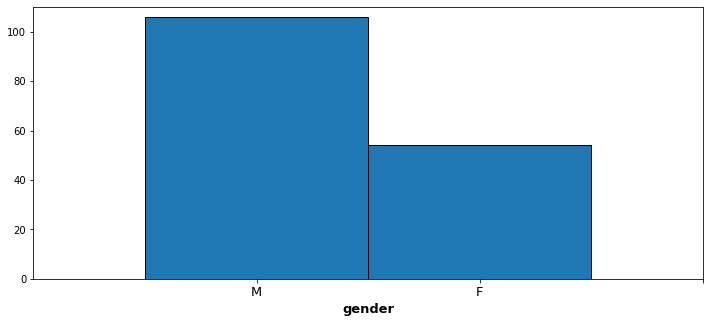

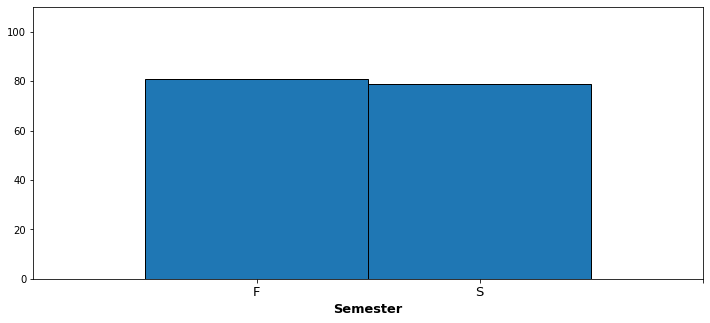

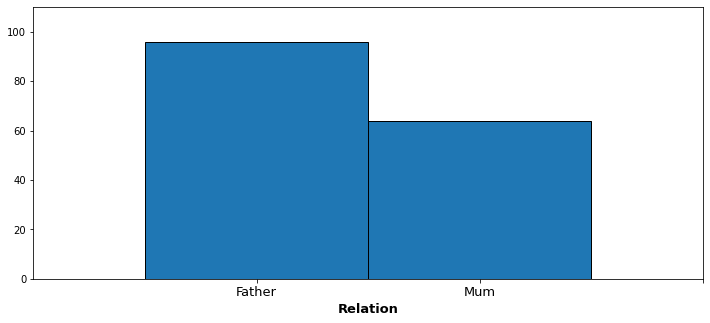

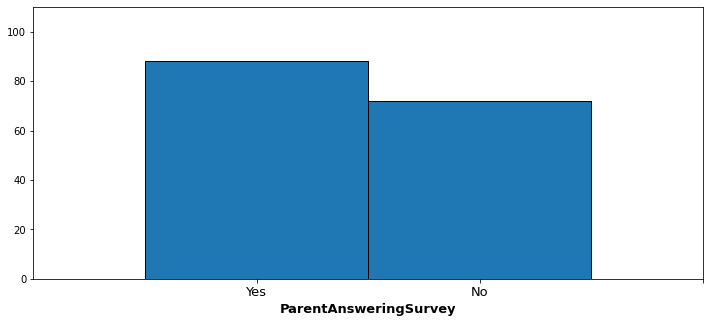

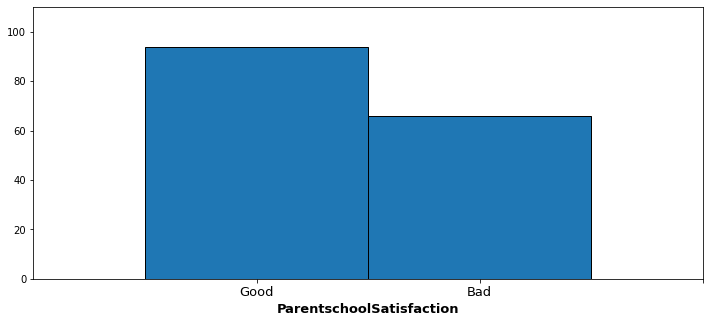

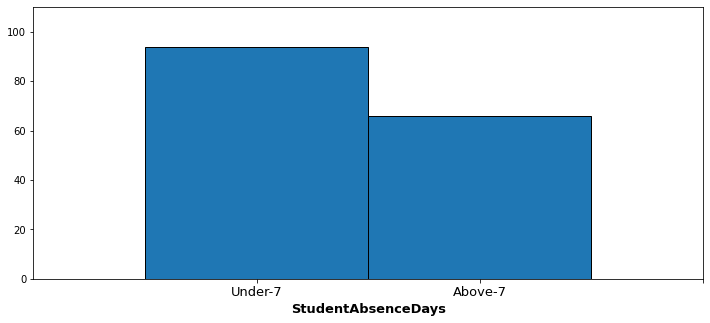

In [11]:
import matplotlib.pyplot as plt

for i in edu_data[sum_no_column_2].columns:
    bins = np.arange(10) - 0.5
    plt.figure(figsize = (12,5))
    plt.hist(x = edu_data[i], bins = bins, edgecolor = "black")    
    plt.xticks(range(10), fontsize = 13)
    plt.xlabel(edu_data[i].name, weight='bold', fontsize = 13)
    plt.xlim([-1, 2])
    plt.ylim(0, 110)
    plt.show()

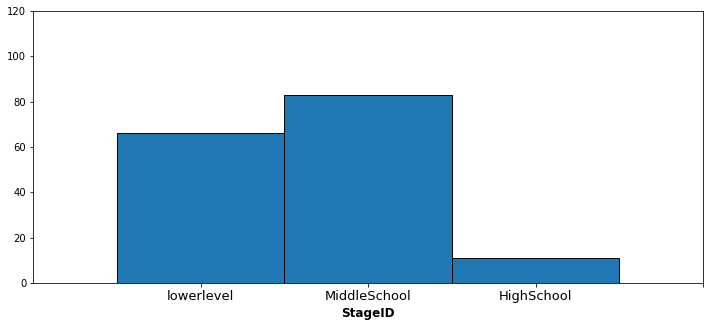

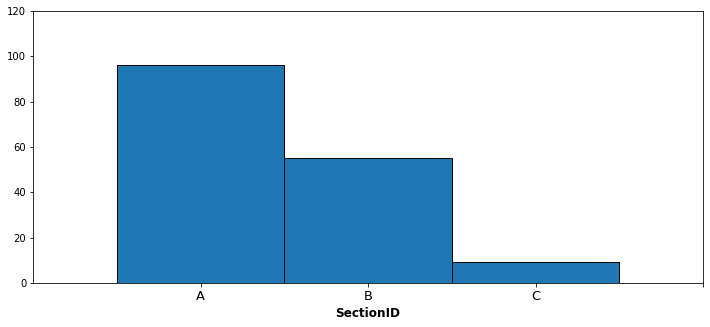

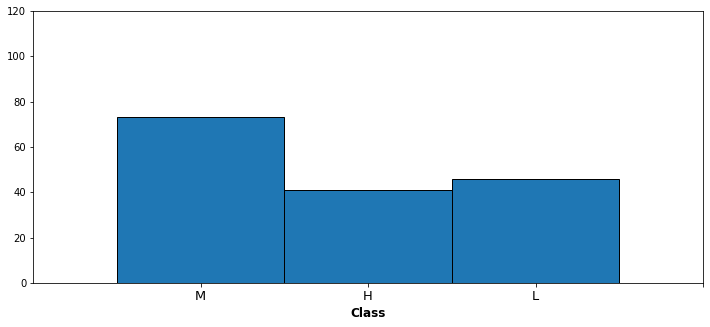

In [12]:
for j in edu_data[sum_no_column_3].columns:
    bins = np.arange(10) - 0.5
    plt.figure(figsize = (12,5))
    plt.hist(x = edu_data[j], bins = bins, edgecolor = "black")
    plt.xticks(range(10), fontsize = 13)
    plt.xlabel(edu_data[j].name, weight='bold', fontsize = 12)
    plt.xlim([-1, 3])
    plt.ylim(0, 120)

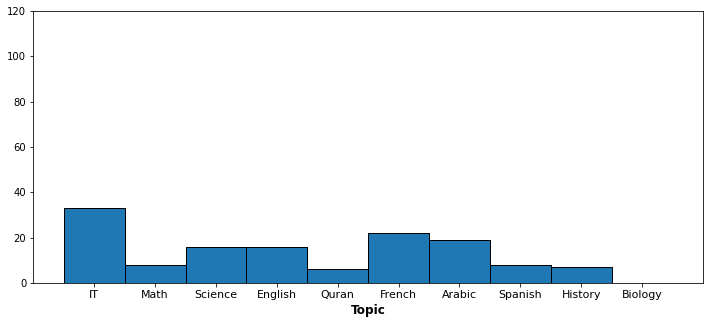

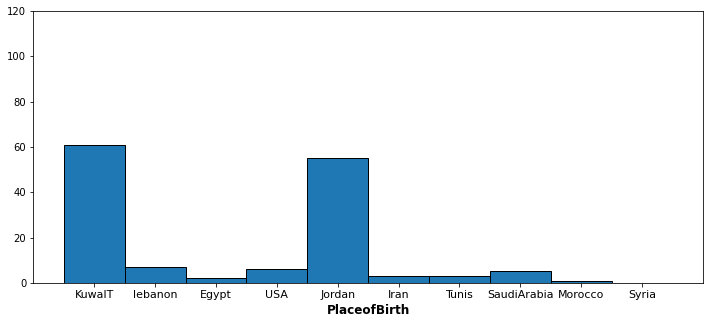

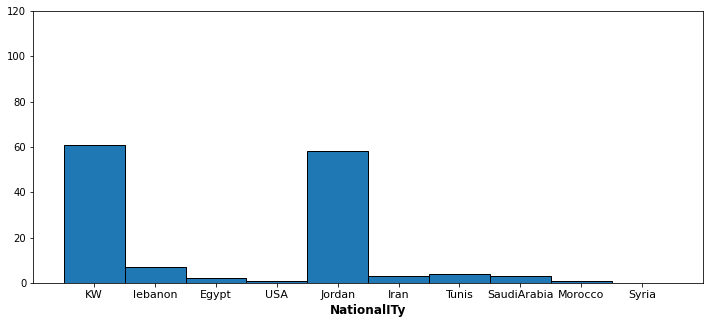

In [13]:
for k in edu_data[sum_no_column_12].columns:
    bins = np.arange(10) - 0.5
    plt.figure(figsize = (12,5))
    plt.hist(x = edu_data[k], bins = bins, edgecolor = "black")
    plt.xticks(range(10), fontsize = 11)
    plt.xlabel(edu_data[k].name, weight='bold', fontsize = 12)
    plt.xlim([-1, 10])
    plt.ylim(0, 120)

In [14]:
kategorik_veriler = [x for x in edu_data.columns if edu_data[x].dtypes == "O"]
# mode_ile_degistir metodu kullanmadan önce 
for i in edu_data[kategorik_veriler].columns:
     print(edu_data[i].value_counts(), "\n\n")

M    106
F     54
Name: gender, dtype: int64 


KW             61
Jordan         58
Iraq            8
lebanon         7
Palestine       7
Tunis           4
Iran            3
SaudiArabia     3
Lybia           3
Egypt           2
Syria           2
USA             1
Morocco         1
Name: NationalITy, dtype: int64 


KuwaIT         61
Jordan         55
Iraq            8
lebanon         7
USA             6
SaudiArabia     5
Palestine       4
Iran            3
Tunis           3
Lybia           3
Egypt           2
Syria           2
Morocco         1
Name: PlaceofBirth, dtype: int64 


MiddleSchool    83
lowerlevel      66
HighSchool      11
Name: StageID, dtype: int64 


A    96
B    55
C     9
Name: SectionID, dtype: int64 


IT           33
French       22
Arabic       19
Science      16
English      16
Biology      10
Math          8
Spanish       8
Chemistry     8
History       7
Geology       7
Quran         6
Name: Topic, dtype: int64 


F    81
S    79
Name: Semester, dtype: int64 



In [15]:
def mode_ile_degistir(dataframe, column_name, threshold = 2):
    """
    Summary : 
    
    Histogramı cizdirilen verisetinde az gorulen degerleri
    en cok tekrar eden degerle degistir(mod).

    Args:
        column_name (str) : dataframe'in kolonunun adı
        threshold (int64) : en az kac deger mod ile degistirilsin, default = 2
        
    Returns:
        data.frame --> edu_data
    """
    
    # threshold'dan az gorulen degerler
    c_data = dataframe[column_name].value_counts() <= threshold
    
    # threshold'dan az gorulen degerlerin adları
    silinecek_verilerin_adları = c_data.index[c_data == True]
    
    # mod bulma(daha sonra en cok tekrar edenle degistirmek icin)
    mode = dataframe.loc[:, [column_name]].mode() 
    
    # silinecek verilerin adlari kadar donen bir for
    for i in range(len(silinecek_verilerin_adları)): 
        
        #degistirelecek verileri tespit etme
        degistirelecek = dataframe[dataframe[column_name] == silinecek_verilerin_adları[i]]
        
        #degistirelecek verileri kolonda en cok tekrar eden degerle(mod) ile degistirme
        dataframe.loc[degistirelecek.index, [column_name]] = mode.values
        
    return dataframe


for i in edu_data[kategorik_veriler].columns:
    mode_ile_degistir(edu_data, edu_data[i].name)

In [16]:
# mode_ile_degistir metodu kullandıktan sonra
for i in edu_data[kategorik_veriler].columns:
     print(edu_data[i].value_counts(), "\n\n")

M    106
F     54
Name: gender, dtype: int64 


KW             67
Jordan         58
Iraq            8
lebanon         7
Palestine       7
Tunis           4
Iran            3
SaudiArabia     3
Lybia           3
Name: NationalITy, dtype: int64 


KuwaIT         66
Jordan         55
Iraq            8
lebanon         7
USA             6
SaudiArabia     5
Palestine       4
Iran            3
Tunis           3
Lybia           3
Name: PlaceofBirth, dtype: int64 


MiddleSchool    83
lowerlevel      66
HighSchool      11
Name: StageID, dtype: int64 


A    96
B    55
C     9
Name: SectionID, dtype: int64 


IT           33
French       22
Arabic       19
Science      16
English      16
Biology      10
Math          8
Spanish       8
Chemistry     8
History       7
Geology       7
Quran         6
Name: Topic, dtype: int64 


F    81
S    79
Name: Semester, dtype: int64 


Father    96
Mum       64
Name: Relation, dtype: int64 


Yes    88
No     72
Name: ParentAnsweringSurvey, dtype: int64 


Go

# Madde 3

In [17]:
kategorik_veriler = [x for x in edu_data.columns if edu_data[x].dtypes == "O"]

In [28]:
Information_Gain_List = []

In [29]:
entropy_list = []

In [30]:
class_haric = kategorik_veriler[:-1]

In [31]:
edu_data.loc[edu_data["gender"] == edu_data.loc[:,"gender"].unique()[0]][["gender", "Class"]].value_counts()

gender  Class
M       M        50
        L        37
        H        19
dtype: int64

#### !!! calculate_column_IG Metodunun calismasi icin calculate_entropy'i calistirmak gerekiyor

In [32]:
def calculate_column_IG(dataframe, column_name, class_label):
    """
    Summary:
        DataFrame'i kolonu ve class label'i verilen
        sütunların information gainini hesaplar
    
    Args:
        dataframe (dataFrame): dataFrame
        column_name (object): kolonun ismi
        class_label (object): hangi class label kullanılacağı
    
    Raises:
        Exception:
        Eger kategorik olmayan bir kolon girilirse
        exception doner
        
    Returns:
        list: 
        Sırasıyla sütunların information gainini doner
"""
    
    # Kolonun entropisini tutmak icin bir degisken
    IG = 0    
    
    # Eger kategorik olmayan bir kolon girilirse exception doner
    if dataframe[column_name].dtypes != 'O':
        raise Exception("Kategorik olmayan kolon goruldu.")
    else:
        
        # kolonlardaki toplam unique degerleri
        kolonun_nunique_sayisi = dataframe[column_name].nunique()
        
        # kolonun_nunique_sayisi kadar donen bir for
        for j in range(kolonun_nunique_sayisi): 
            
            # hic na deger var mi ?
            if dataframe.isna().values.any(): 
                dataframe = dataframe.dropna() # varsa dusur
            else:
                # ilgili kolonun her bir unique degerinin class label ile ikili kombinasyonunu al bir data frame'e cevir 
                hesaplanmak_istenen_sutun = pd.DataFrame(dataframe.loc[dataframe[column_name] == dataframe.loc[:,column_name].unique()[j]][[column_name, class_label]])
                
                """
                gender  Class
                M       M        50
                        L        37
                        H        19
                """
                # vc_of_his icin yukarıda gender kolonunun 'M' degeri icin bir cikti var
                # gender 'M' iken Class icin ['M', 'L', 'H'] degerlerini getirtir
                vc_of_his = pd.DataFrame(hesaplanmak_istenen_sutun.value_counts())
                
                # Hesaplanmak istenen sutunların entropilerini hesaplattir
                Entropy_of_his = entropy_calculate(hesaplanmak_istenen_sutun, hesaplanmak_istenen_sutun[class_label].name)
                
                # bir sutünun her bir unique degerini level diye bir degiskende tut
                level = dataframe.loc[:,column_name].unique()[j]
                
                # yukarıda verilen ornekde ki gibi tum degerlerin teker teker toplamini bul (gender ornegi)
                SUM = vc_of_his.xs(level)[0].sum() # multindex oldugu icin xs ile eristik
                row_of_df = dataframe.shape[0]
                
                # her bir kolonun unique degerlerinin olasiligini bul ## gender icin ornek (50+37+19) / row_of_df
                prob = SUM / row_of_df
                
                # Entropy_of_his'e son eklenen degerle olasılıgını carp ve ilgili kolonun entropy'sini bul
                IG += (Entropy_of_his[-1] * prob)
                #print(level," | ", SUM, " | ", Entropy_of_his[-1], " * (", SUM, "/",row_of_df, ") --> ", IG, "\n")
                
                # eger kolon icin son unique degere geldiyse hesaplama bitti listeye ekle
                if j == kolonun_nunique_sayisi - 1:
                    Information_Gain_List.append(IG)
                    IG = 0 # sonraki kolon icin yeniden IG hesaplamak icin sifirladik
                    
    return print(Information_Gain_List[-1])

In [33]:
for i in edu_data[class_haric].columns:
    calculate_column_IG(edu_data, edu_data[i].name, "Class")

1.4849471307236142
1.3513134930223374
1.3403117381486656
1.4973374347879271
1.505918635087016
1.406668763678674
1.5344141610705038
1.3805581625305408
1.3725396275467272
1.4171674918943342
1.134201086906912


In [34]:
Information_Gain_List

[1.4849471307236142,
 1.3513134930223374,
 1.3403117381486656,
 1.4973374347879271,
 1.505918635087016,
 1.406668763678674,
 1.5344141610705038,
 1.3805581625305408,
 1.3725396275467272,
 1.4171674918943342,
 1.134201086906912]

In [36]:
ozelliklerin_InformationGainleri = pd.DataFrame(index = [class_haric], data = Information_Gain_List)#.sort_values(by = [0])
ozelliklerin_InformationGainleri.rename(columns={0:"Information_Gain_of_Column"})

,Information_Gain_of_Column
gender,1.484947
NationalITy,1.351313
PlaceofBirth,1.340312
StageID,1.497337
SectionID,1.505919
Topic,1.406669
Semester,1.534414
Relation,1.380558
ParentAnsweringSurvey,1.372540
ParentschoolSatisfaction,1.417167


In [37]:
# Kolon Entropisi icin DataFrame
pd_for_Kolon_Entropi = pd.DataFrame(Information_Gain_List)

# Genel(Class_Label) Entropi icin DataFrame
array_for_Genel_Entropi = []

lenght_for_GE = 11
for j in range(lenght_for_GE):
    array_for_Genel_Entropi.append(ozelliklerin_Entropileri.iloc[8,0])

array_for_Genel_Entropi
pd_for_Genel_Entropi = pd.DataFrame(array_for_Genel_Entropi)

# Information Gain icin DataFrame
array_for_IG = []
lenght_of_IG = len(Information_Gain_List)
for i in range(lenght_of_IG):
    Genel_Entropi = ozelliklerin_Entropileri.iloc[8,0]
    Kolon_Entropileri = Information_Gain_List[i]
    Information_Gain = Genel_Entropi - Kolon_Entropileri
    array_for_IG.append(Information_Gain)
    #print(Genel_Entropi, "-" ,Kolon_Entropileri, ":", Information_Gain)

pd_for_IG = pd.DataFrame(array_for_IG) 

In [38]:
Information_Gain_pd = pd.DataFrame(index=class_haric)
Information_Gain_pd.insert(0,"Genel_Entropi",pd_for_Genel_Entropi)
Information_Gain_pd.insert(1,"Kolon_Entropisi",pd_for_Kolon_Entropi)
Information_Gain_pd.insert(2,"Information_Gain",pd_for_IG)
Information_Gain_pd

,Genel_Entropi,Kolon_Entropisi,Information_Gain
gender,1.536924,1.484947,0.051977
NationalITy,1.536924,1.351313,0.185610
PlaceofBirth,1.536924,1.340312,0.196612
StageID,1.536924,1.497337,0.039586
SectionID,1.536924,1.505919,0.031005
Topic,1.536924,1.406669,0.130255
Semester,1.536924,1.534414,0.002510
Relation,1.536924,1.380558,0.156366
ParentAnsweringSurvey,1.536924,1.372540,0.164384
ParentschoolSatisfaction,1.536924,1.417167,0.119756


# Madde 4

In [22]:
import math
from scipy.stats import entropy
kategorik_veriler = [x for x in edu_data_copy.columns if edu_data_copy[x].dtypes == "O"]

In [25]:
entropy_list = []

In [26]:
def entropy_calculate(dataframe, column_name):
    """
    Summary:
        Veri setinin tüm kolonlarının entropsini bulup
        sırasıyla liste icine ekliyor

    Args:
        dataframe (data.Frame): Veri seti
        column_name (str): kolonun adı
    
    Raises :
        Exception :
            Eger object veri tipi dışında bir
            veri tipi girilirse exception fırlatır.
        
    Returns:
        list : kolonların entropileri      
    """
    if dataframe[column_name].dtypes == "O":
        c_data_copy = dataframe[column_name].value_counts()
        
        entropy = 0
        len_of_cdata = len(c_data_copy)
        
        for i in range(len_of_cdata):
             
            p_of_val = (c_data_copy[i] / dataframe.shape[0])
            entropy += -(math.log(p_of_val, 2) * p_of_val)
            
            if i == len_of_cdata - 1:
                entropy_list.append(entropy)
    else:
        raise Exception("Sadece kategorik verilerin entropisi hesaplanır.")
        
    return entropy_list


for i in edu_data_copy[kategorik_veriler].columns:
    entropy_calculate(edu_data_copy, edu_data_copy[i].name)

In [27]:
ozelliklerin_Entropileri = pd.DataFrame(index = [kategorik_veriler], data = entropy_list).sort_values(by = [0])
ozelliklerin_Entropileri.rename(columns={0:"Entropiler"})

,Entropiler
gender,0.922406
Relation,0.970951
ParentschoolSatisfaction,0.977795
StudentAbsenceDays,0.977795
ParentAnsweringSurvey,0.992774
Semester,0.999887
SectionID,1.205300
StageID,1.283728
Class,1.536924
NationalITy,2.377519


# Madde 5

In [39]:
numeric_veriler = [x for x in edu_data.columns if (edu_data[x].dtypes == "int64") or 
                                                (edu_data[x].dtypes == "float64")]

new_df_for_PCA = edu_data_copy[numeric_veriler]
new_df_for_PCA

,raisedhands,AnnouncementsView,Discussion
0,20,3,25
1,40,12,50
2,50,15,22
3,50,30,80
4,20,12,19
...,...,...,...
155,80,64,58
156,9,15,85
157,80,74,68
158,5,5,8


In [40]:
# Normalization part
from sklearn.preprocessing import StandardScaler

new_df_for_PCA = StandardScaler().fit_transform(new_df_for_PCA.values)
new_df_for_PCA

array([[-0.80659302, -1.35900449, -0.63388747],
       [-0.1646886 , -1.00722191,  0.26524369],
       [ 0.15626361, -0.88996105, -0.74178321],
       [ 0.15626361, -0.30365676,  1.34420109],
       [-0.80659302, -1.00722191, -0.84967895],
       [-0.29306948, -0.69452629,  1.34420109],
       [ 0.79816802,  0.08721276,  2.02754077],
       [-0.96706912, -1.39809144,  1.70385355],
       [-1.19173567, -0.30365676, -0.09440877],
       [ 0.95864413,  0.5562562 ,  0.01348697],
       [-1.32011655,  0.08721276, -0.95757469],
       [-1.06335478, -1.16356972, -0.09440877],
       [-0.0042125 , -0.46000457,  1.70385355],
       [-0.99916434, -1.35900449,  0.98454862],
       [-0.48564081, -0.38183067,  1.70385355],
       [-1.22383089, -1.43717839, -0.45406124],
       [-0.51773603,  0.47808229,  1.23630535],
       [ 0.31673971, -0.8508741 , -0.09440877],
       [-0.9349739 , -1.24174363, -0.8137137 ],
       [-0.54983125, -0.73361324,  0.26524369],
       [ 0.15626361, -0.22548286, -0.094

In [42]:
# PCA uygulanan kısım
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(new_df_for_PCA)

after_PCA_edu_data = pd.DataFrame(data = principalComponents, columns = ["PCA1", "PCA2"])
after_PCA_edu_data

,PCA1,PCA2
0,-1.654579,0.128705
1,-0.607372,0.521497
2,-0.832320,-0.516729
3,0.557918,1.143111
4,-1.537114,-0.131887
...,...,...
155,1.591197,-0.272778
156,-0.515360,2.041128
157,2.014475,-0.049051
158,-2.192576,-0.185703


In [43]:
print('Explained variation principal component: {}'.format(pca.explained_variance_))

Explained variation principal component: [1.94073904 0.7275356 ]


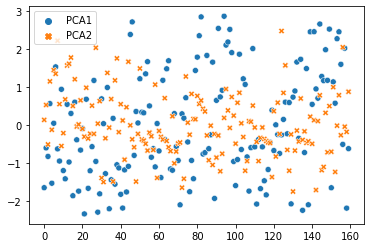

In [44]:
import seaborn as sns

sns_plot = sns.scatterplot(data = after_PCA_edu_data)

In [45]:
plt.savefig("edu_data_PCA.png")

<Figure size 432x288 with 0 Axes>

# Madde 6

In [46]:
X = after_PCA_edu_data.iloc[:, [0, 1]]
y = edu_data.loc[:, "Class"]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)
print(len(X_test),len(X_train))

16 144


In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)

print(f"Accuracy : {ac}")

Accuracy : 0.75
